# <b> Group 4 - Will Fink, Aiden Browne, Azeh Ndifor, Diana Sethna, Jyotleen DeWal, Zeynep Uzun, Shivani Virani <b>

## <b> IF model: <b>

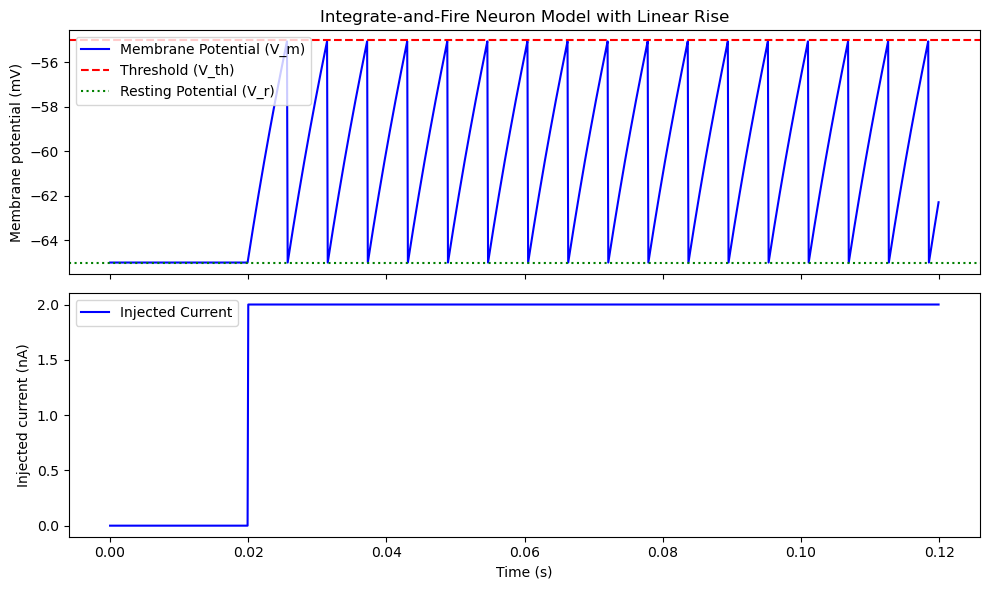

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.0001  # Time step (s)
T = 0.12     # Total simulation time (s)
time = np.arange(0, T, dt)

# Model parameters
V_rest = -65  # Resting potential (mV)
V_th = -55    # Threshold potential (mV)
V_reset = -65 # Reset potential (mV)
R_m = 10      # Membrane resistance (MOhm)
tau_m = 10e-3 # Membrane time constant (s)

# Input current (step current)
I_injected = np.zeros_like(time)
I_injected[int(0.02 / dt):] = 2.0  # Current of 2 nA applied after 20 ms

# Initialize membrane potential
V_m = np.ones_like(time) * V_rest
spikes = []

# Simulate the neuron
for t in range(1, len(time)):
    if V_m[t-1] >= V_th:
        V_m[t-1] = V_reset  # Reset after spike
        spikes.append(time[t-1])
    
    # Modified update rule for a more linear rise
    dV = ((V_rest - V_m[t-1]) + R_m * I_injected[t]) / tau_m * dt
    V_m[t] = V_m[t-1] + dV * 0.5 + 0.5 * (R_m * I_injected[t] * dt / tau_m)  # Adjusting for more linear rise

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot membrane potential
axes[0].plot(time, V_m, label="Membrane Potential (V_m)", color="blue")
axes[0].axhline(V_th, color="red", linestyle="--", label="Threshold (V_th)")
axes[0].axhline(V_rest, color="green", linestyle=":", label="Resting Potential (V_r)")
axes[0].set_ylabel("Membrane potential (mV)")
axes[0].legend()
axes[0].set_title("Integrate-and-Fire Neuron Model with Linear Rise")

# Plot input current
axes[1].plot(time, I_injected, label="Injected Current", color="blue")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Injected current (nA)")
axes[1].legend()

plt.tight_layout()
plt.show()


## <b> HH model: <b>

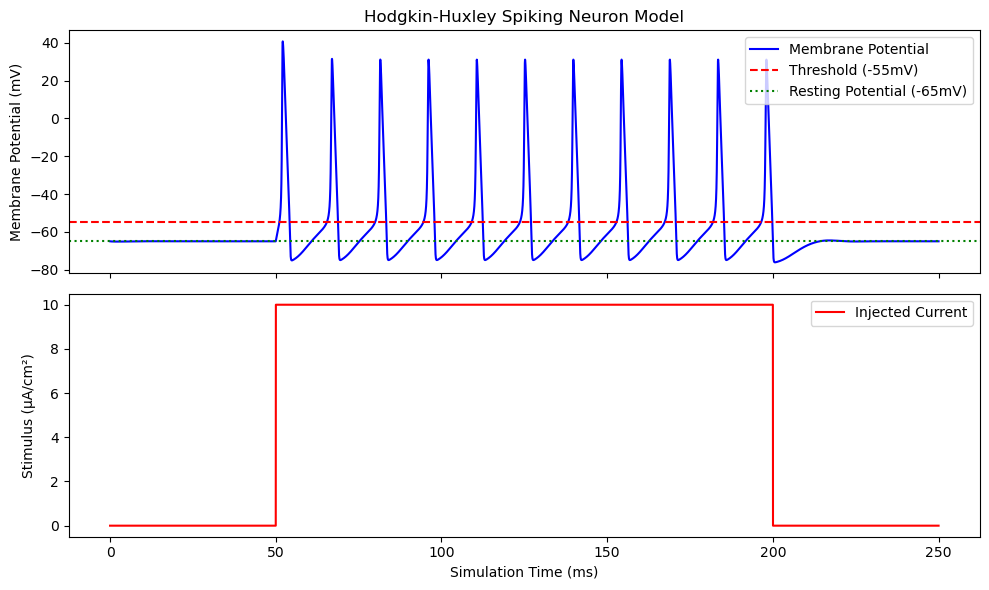

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01  # Time step (ms)
T = 250     # Total simulation time (ms)
time = np.arange(0, T, dt)

# Hodgkin-Huxley Model Parameters
Cm = 1.0   # Membrane capacitance (uF/cm^2)
V_rest = -65  # Resting potential (mV)

# Maximal conductances (mS/cm^2)
G_Na = 120  # Sodium
G_K = 36    # Potassium
G_L = 0.3   # Leak

# Reversal potentials (mV)
E_Na = 50   # Sodium
E_K = -77   # Potassium
E_L = -54.4 # Leak

# Injected current (step current)
I_injected = np.zeros_like(time)
I_injected[int(50 / dt):int(200 / dt)] = 10  # Current applied between 50ms and 200ms

# Gating variables and voltage initialization
V_m = np.ones_like(time) * V_rest
m = 0.05  # Sodium activation gate
h = 0.6   # Sodium inactivation gate
n = 0.32  # Potassium activation gate

def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Simulation loop
for t in range(1, len(time)):
    m += dt * (alpha_m(V_m[t-1]) * (1 - m) - beta_m(V_m[t-1]) * m)
    h += dt * (alpha_h(V_m[t-1]) * (1 - h) - beta_h(V_m[t-1]) * h)
    n += dt * (alpha_n(V_m[t-1]) * (1 - n) - beta_n(V_m[t-1]) * n)
    
    I_Na = G_Na * (m**3) * h * (V_m[t-1] - E_Na)
    I_K = G_K * (n**4) * (V_m[t-1] - E_K)
    I_L = G_L * (V_m[t-1] - E_L)
    
    dV = (I_injected[t] - I_Na - I_K - I_L) / Cm * dt
    V_m[t] = V_m[t-1] + dV

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot membrane potential
axes[0].plot(time, V_m, label="Membrane Potential", color="blue")
axes[0].axhline(V_th, color="red", linestyle="--", label="Threshold (-55mV)")
axes[0].axhline(V_rest, color="green", linestyle=":", label="Resting Potential (-65mV)")
axes[0].set_ylabel("Membrane Potential (mV)")
axes[0].set_title("Hodgkin-Huxley Spiking Neuron Model")
axes[0].legend()

# Plot input current
axes[1].plot(time, I_injected, label="Injected Current", color="red")
axes[1].set_xlabel("Simulation Time (ms)")
axes[1].set_ylabel("Stimulus (μA/cm²)")
axes[1].legend()

plt.tight_layout()
plt.show()


## <b> Feedforward Neural Network Model: <b>

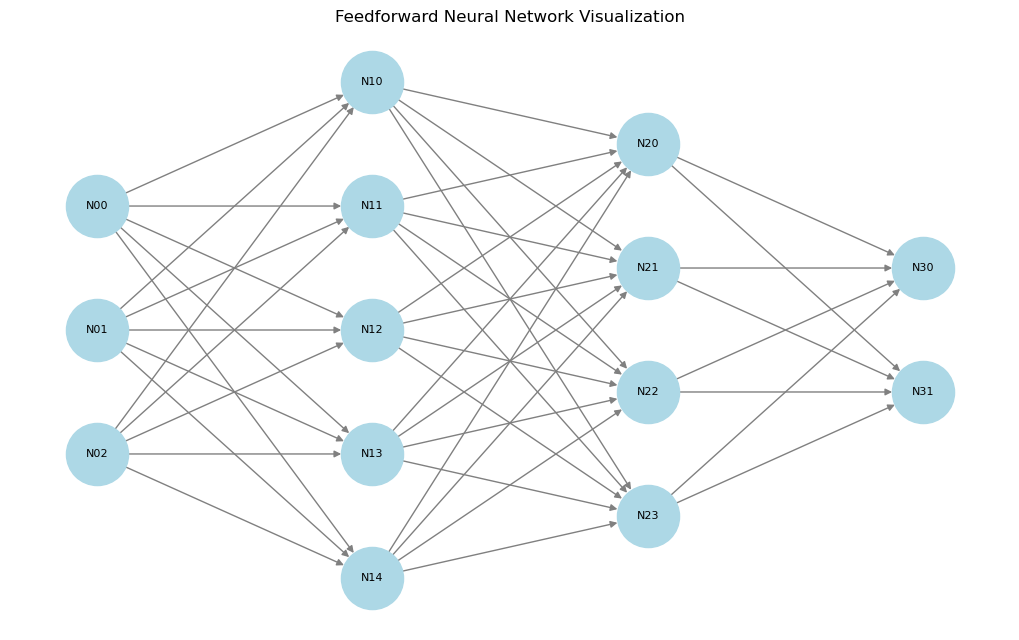

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_fnn(layer_sizes):
    """
    Draws a feedforward neural network diagram.
    :param layer_sizes: List containing the number of neurons in each layer.
    """
    G = nx.DiGraph()
    pos = {}
    node_labels = {}
    
    x_spacing = 2  # Space between layers
    y_spacing = 1  # Space between neurons
    
    for i, layer_size in enumerate(layer_sizes):
        for j in range(layer_size):
            node_id = (i, j)
            G.add_node(node_id)
            pos[node_id] = (i * x_spacing, -j * y_spacing + (layer_size - 1) * y_spacing / 2)
            node_labels[node_id] = f'N{i}{j}'
    
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                G.add_edge((i, j), (i + 1, k))
    
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000, node_color='lightblue', font_size=8, edge_color='gray')
    plt.title("Feedforward Neural Network Visualization")
    plt.show()

# Example usage
draw_fnn([3, 5, 4, 2])




## <b> Question 3: Discussing and comparing models <b>

The Integrate-and-Fire (IF) model is the simplest way to represent how a neuron works. It acts like a bucket collecting water: when it fills up to a certain level, it spills over (fires a signal) and then resets. In other words, the neuron is modeled to integrate incoming currents until a threshold is reached and a spike is generated. After this, the neuron fully resets. This model is easy to use in large simulations as it is computationally efficient but is not realistic because biological neurons demonstrate a refractory period and ion channels. A small improvement is the Leaky Integrate-and-Fire (LIF) model, which adds a "leak” component of ion channels. This means that the neuron loses some charge over time, making it behave more like a real cell. While this model is still computationally simple and has more biological relevance than the IF model, it still does not account for voltage gated ion channels. If you want the most detailed and accurate neuron model, the Hodgkin-Huxley (HH) model is the best. It tracks the flow of specific ions (like sodium and potassium) through voltage gated ion channels in a neuron, which makes it highly realistic but requires a lot of computing power to simulate.Feedforward neural networks (FNN), on the other hand, are designed for tasks like pattern recognition and prediction making. Information within a FNN moves in one direction: the input goes in, gets processed in the hidden layers, and comes out as an answer. These kinds of networks are used often in AI but can’t capture how biological neurons actually work. The IF) model is a basic way to show how a neuron works. It collects signals until it reaches a limit, then fires and resets. This model is easy to use in large simulations but is not very realistic since real neurons have recovery times and ion channels. The LIF model improves this by allowing some charge to leak out over time, making it more like a real neuron while still being simple to use. The HH model is the most accurate because it tracks how specific ions move through channels, but it needs a lot of computing power. Unlike these neuron models, FNNs are used in AI to recognize patterns and make predictions. They process information step by step but do not work like real neurons.

Information Theory demonstrates that the complexity and amount of information contained within each model varies significantly. This can be thought of in terms of bits of information where more bits represents a greater amount of encoded data. The IF model is the most concise and contains the fewest bits of information as it simplifies neuronal function down to a basic threshold mechanism. A simple binary output can indicate if a neuron will spike or not. The LIF model introduces a “leaky” component which slightly increases the complexity. This means it requires more bits of information compared to the IF model. However, this model is still relatively simple computationally. 

The HH model uses many more bits of information as it tracks the movement of ions such as sodium and potassium through voltage gated channels. This makes this model very detailed but also computationally expensive. Instead of modeling individual neuron dynamics, FNNs take in inputs and apply weights to them. Therefore, the amount of bits of information in a FNN will depend on how many neurons it is modeling and how many connections are present among that subset of neurons. FNNs can therefore encode far more data than the HH model and this makes it much more complex than the previous models. However, this complexity is different as it does not model specific biological function of neurons but instead models the learning patterns of an entire subset of a neuronal population. 


## <b> Question 4: Model with inputs differing

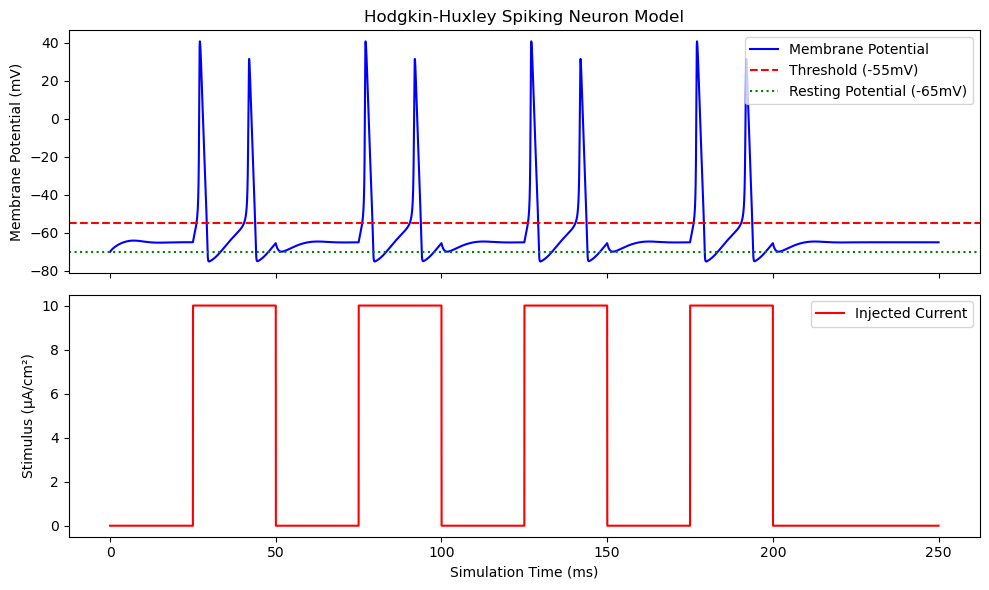

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01  # Time step (ms)
T = 250     # Total simulation time (ms)
time = np.arange(0, T, dt)

# Hodgkin-Huxley Model Parameters
Cm = 1.0   # Membrane capacitance (uF/cm^2)
V_rest = -70  # Resting potential (mV)

# Maximal conductances (mS/cm^2)
G_Na = 120  # Sodium
G_K = 36    # Potassium
G_L = 0.3   # Leak

# Reversal potentials (mV)
E_Na = 50   # Sodium
E_K = -77   # Potassium
E_L = -54.4 # Leak

# Injected current (Altered code chunk)
I_injected = np.zeros_like(time)
I_injected[int(25 / dt):int(50 / dt)] = 10  # Current applied between 25ms and 50ms
I_injected[int(75 / dt):int(100 / dt)] = 10 # Current applied between 75ms and 100 ms
I_injected[int(125 / dt):int(150 / dt)] = 10  # Current applied between 125ms and 150ms
I_injected[int(175 / dt):int(200 / dt)] = 10  # Current applied between 175ms and 200ms

# Gating variables and voltage initialization
V_m = np.ones_like(time) * V_rest
m = 0.05  # Sodium activation gate
h = 0.6   # Sodium inactivation gate
n = 0.32  # Potassium activation gate

def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Simulation loop
for t in range(1, len(time)):
    m += dt * (alpha_m(V_m[t-1]) * (1 - m) - beta_m(V_m[t-1]) * m)
    h += dt * (alpha_h(V_m[t-1]) * (1 - h) - beta_h(V_m[t-1]) * h)
    n += dt * (alpha_n(V_m[t-1]) * (1 - n) - beta_n(V_m[t-1]) * n)
    
    I_Na = G_Na * (m**3) * h * (V_m[t-1] - E_Na)
    I_K = G_K * (n**4) * (V_m[t-1] - E_K)
    I_L = G_L * (V_m[t-1] - E_L)
    
    dV = (I_injected[t] - I_Na - I_K - I_L) / Cm * dt
    V_m[t] = V_m[t-1] + dV

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot membrane potential
axes[0].plot(time, V_m, label="Membrane Potential", color="blue")
axes[0].axhline(V_th, color="red", linestyle="--", label="Threshold (-55mV)")
axes[0].axhline(V_rest, color="green", linestyle=":", label="Resting Potential (-65mV)")
axes[0].set_ylabel("Membrane Potential (mV)")
axes[0].set_title("Hodgkin-Huxley Spiking Neuron Model")
axes[0].legend()

# Plot input current
axes[1].plot(time, I_injected, label="Injected Current", color="red")
axes[1].set_xlabel("Simulation Time (ms)")
axes[1].set_ylabel("Stimulus (μA/cm²)")
axes[1].legend()

plt.tight_layout()
plt.show()


#### The injected current was changed to simulate a bursting firing pattern. To accomplish this change in the code we modified the parameters of the original current injection from 50ms - 200ms to 25ms - 50ms. We also added several more lines of code to represent a bursting pattern of 25ms of no input followed by 25ms of injected current. This change in the code allowed for the model to show a new bursting firing pattern instead of the constant spike train that was shown before.

## <b> Question 5: Inhibitory Inputs

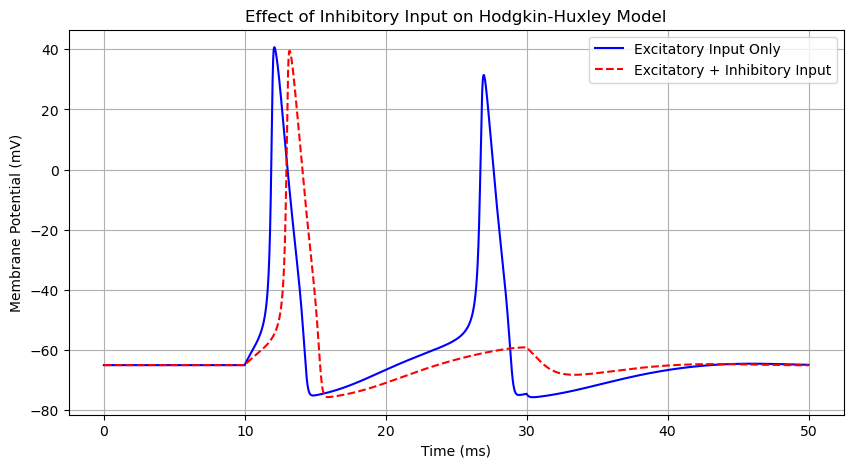

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Hodgkin-Huxley Model Parameters
C_m = 1.0  # Membrane capacitance, in uF/cm^2
g_Na = 120.0  # Maximum conductance of Na+ channels (mS/cm^2)
g_K = 36.0  # Maximum conductance of K+ channels (mS/cm^2)
g_L = 0.3  # Leak conductance (mS/cm^2)
E_Na = 50.0  # Sodium reversal potential (mV)
E_K = -77.0  # Potassium reversal potential (mV)
E_L = -54.4  # Leak reversal potential (mV)

# Time parameters
dt = 0.01  # Time step (ms)
T = 50.0  # Total simulation time (ms)
time = np.arange(0, T, dt)

# External currents
I_exc = np.zeros(len(time))
I_exc[1000:3000] = 10  # Excitatory input applied between 10ms-30ms

I_inh = np.zeros(len(time))
I_inh[1000:3000] = -5  # Inhibitory input applied during the same period

# Hodgkin-Huxley gating functions
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-0.0556 * (V + 65))
def alpha_h(V): return 0.07 * np.exp(-0.05 * (V + 65))
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Function to integrate HH model
def simulate_HH(I_ext):
    V = -65.0  # Initial membrane potential (mV)
    m = alpha_m(V) / (alpha_m(V) + beta_m(V))
    h = alpha_h(V) / (alpha_h(V) + beta_h(V))
    n = alpha_n(V) / (alpha_n(V) + beta_n(V))

    V_trace = []  # To store membrane potential over time

    for t in time:
        # Compute conductances
        m += dt * (alpha_m(V) * (1 - m) - beta_m(V) * m)
        h += dt * (alpha_h(V) * (1 - h) - beta_h(V) * h)
        n += dt * (alpha_n(V) * (1 - n) - beta_n(V) * n)

        # Compute currents
        I_Na = g_Na * m**3 * h * (V - E_Na)
        I_K = g_K * n**4 * (V - E_K)
        I_L = g_L * (V - E_L)

        # Update voltage
        V += dt * (I_ext[int(t/dt)] - I_Na - I_K - I_L) / C_m

        # Store result
        V_trace.append(V)

    return np.array(V_trace)

# Simulate both cases
V_exc = simulate_HH(I_exc)  # Excitatory input only
V_inh = simulate_HH(I_exc + I_inh)  # Excitatory + Inhibitory input

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(time, V_exc, label="Excitatory Input Only", color="blue")
plt.plot(time, V_inh, label="Excitatory + Inhibitory Input", color="red", linestyle="dashed")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Effect of Inhibitory Input on Hodgkin-Huxley Model")
plt.legend()
plt.grid()
plt.show()


#### The blue line represents excitatory input only, and shows normal action potentials when the input is applied. The red dashed line represents the application of both excitatory and inhibitory inputs. In the code, the inhibitory input is applied at t = 10 sec, and continues until t = 30 sec. The first action potential with the inhibitory input occurs, which results in an action potential. However, when the inhibitory input takes effect on the second spike, the firing is suppressed, resulting in reduced/delayed action potentials. The negative current from the inhibitory input hyperpolarizes the membrane potential, counteracting the depolarizing effect from the excitatory input, reducing the likelihood of reaching the membrane threshold. Since the inhibition is applied after the depolarization has already started and is not very strong, the inhibition  does not prevent the first action potential. It mainly affects later spikes, demonstrating the effect of inhibitory currents on neuronal firing patterns.

## <b> Question 6: Lateral Inhibition in the Visual System Article